<a href="https://colab.research.google.com/github/saketh1999/ml-kmeans/blob/main/Assignment_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width

50 samples for setosa, 50 samples for versicolor

   


(100, 2)


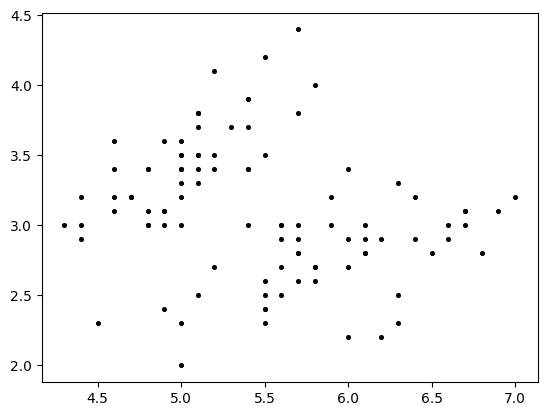

In [1]:
# Load dataset and plot it

%matplotlib inline
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt

df = pd.read_csv('simple_iris_dataset.csv')

df1 = df['sepal_length'].values
df2 = df['sepal_width'].values
X = np.array(list(zip(df1, df2)))   # 100 x 2
plt.scatter(df1, df2, c='black', s=7)
print(X.shape)

In [2]:

def plot_clusters(x, clusters, centroids):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    k,l = np.shape(centroids)

    fig, ax = plt.subplots()
    for i in range(k):
        print(colors[i])
        points = np.array([x[j] for j in range(len(x)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=150, c='y')

In [3]:
def find_clusters(X):
  k=2
  N = len(X)
  ctr0 = X[(np.random.randint(0,N)),:]
  ctr1 = X[(np.random.randint(0,N)),:]

  # Initialize the centroids
  centroids = np.array(list(zip(ctr0, ctr1)), dtype=np.float32)  # 2x2

  # Cluster indices
  clusters = np.zeros(len(X))

  max_itr = 100
  for itr in range(0,max_itr):
    for i in range(N):
        t1 = np.linalg.norm(ctr0 - X[i])
        t2 = np.linalg.norm(ctr1 - X[i])
        if t1 < t2:
          clusters[i] = 0
        else:
          clusters[i] = 1
    temp0, temp1 = X[np.where(clusters==0)], X[np.where(clusters==1)]
    ctr0, ctr1 = np.mean(temp0, axis=0), np.mean(temp1, axis=0)
    centroids = np.array([ctr0, ctr1])
  print('Algorithm converges after {} iterations'. format(itr))
  return clusters, centroids

Algorithm converges after 99 iterations
r
g


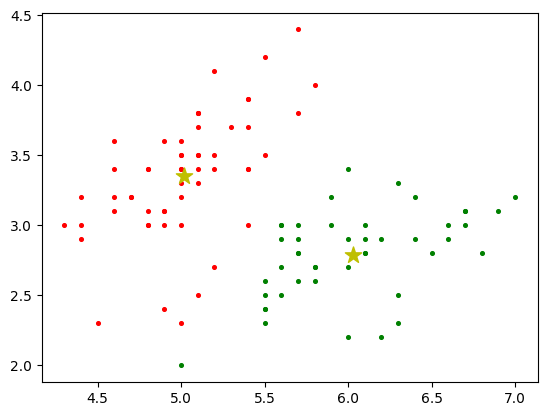

In [4]:
clusters, centroids = find_clusters(X)
plot_clusters(X, clusters, centroids)